<a href="https://colab.research.google.com/github/adshyam/Scholastic-Gradient-Descent-Practice/blob/main/logistic_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [ ]:
X.shape, y.shape

((50000, 15), (50000,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [ ]:
from sklearn import linear_model

In [ ]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [ ]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [ ]:
 # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
def sigmoid(w,xi,b):
  result= 1/(1+np.exp(-(np.dot(w,xi)+b)))
  return result
def logistic_loss(w,xi,b,yi):
  total=0
  for i in range(len(xi)):
    total=total+ yi[i]*np.log(sigmoid(w,xi[i],b))+(1-yi[i])*np.log(1-sigmoid(w,xi[i],b ))
  log_loss=total*(-1/len(xi))
  return log_loss
print("logistic loss for train data is ",logistic_loss(w,X_train,b,y_train))

print("logistic loss for test data is " ,logistic_loss(w,X_test,b,y_test))


logistic loss for train data is  0.6931471805594285
logistic loss for test data is  0.6931471805600673


In [ ]:
# now next task is to find the best w and b so that we minimize the loss 
# note minimizing loss is maxmizing the # of correctly guessed points by the logistic regression
# best w and b can found by the technique of SGD
# IN SGD technique, we update the value of w and be in each iteration so that after some iteration, we get optimal value of w and b 
# log loss in each iteration could be seen and will be decreasing logistic loss


In [ ]:
trainloss=[]
testloss=[]
 
def bestw(w,eta0, lamda, xi,yi,b):
  result= w*(1-(eta0*lamda)/(len(xi))) +eta0*xi*(yi-sigmoid(w,xi,b))
  return result
 
def bestb(w,eta0,xi,yi,b):
  result=b+eta0*(yi-sigmoid(w,xi,b))
  return result
updated_w=w
updated_b=b
for epoch in range(1,11):

  for i in range(N):
    updated_w=bestw(updated_w,eta0,alpha,X_train[i],y_train[i],updated_b)
    updated_b=bestb(updated_w,eta0,X_train[i],y_train[i],updated_b)
     
  train_loss=logistic_loss(updated_w,X_train,updated_b,y_train)
  trainloss.append(train_loss)
 
  
  test_loss=logistic_loss(updated_w,X_test,updated_b,y_test)
  testloss.append(test_loss)
  print("with b :",updated_b)
  print("the X train logistic loss in epoch ", epoch," :",train_loss)
  print("the X test logistic loss in epoch ", epoch," :",test_loss)
  print("*"*70)
  
print("Final w is : ",updated_w)
print("Final b is : ",updated_b)

 

with b : -0.31459326332545384
the X train logistic loss in epoch  1  : 0.40403338932001165
the X test logistic loss in epoch  1  : 0.4051791661729648
**********************************************************************
with b : -0.4709459802864583
the X train logistic loss in epoch  2  : 0.3884044680473908
the X test logistic loss in epoch  2  : 0.390081035010181
**********************************************************************
with b : -0.5798252917073647
the X train logistic loss in epoch  3  : 0.38314938434256185
the X test logistic loss in epoch  3  : 0.38502501943880163
**********************************************************************
with b : -0.6591552853297546
the X train logistic loss in epoch  4  : 0.3807880436557241
the X test logistic loss in epoch  4  : 0.38274338648211076
**********************************************************************
with b : -0.7177702984057924
the X train logistic loss in epoch  5  : 0.37960715850231336
the X test logistic loss in ep

In [ ]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 0.42336692, -0.18547565,  0.14859036, -0.34144407,  0.2081867 ,
         -0.56016579,  0.45242483,  0.09408813, -0.2092732 , -0.18084126,
         -0.19705191, -0.00421916,  0.0796037 , -0.33852802, -0.02266721]]),
 array([0.8531383]))

In [ ]:
# these are the result I got after my Implementation
print(updated_w-clf.coef_ )
print(updated_b-clf.intercept_)

[[ 0.00022941  0.0054775   0.0027196  -0.00330742 -0.00376692  0.00507149
   0.00705267  0.00237458  0.00867294 -0.01107721 -0.00183915 -0.00192435
   0.001793    0.0002869  -0.00052384]]
[0.00304771]


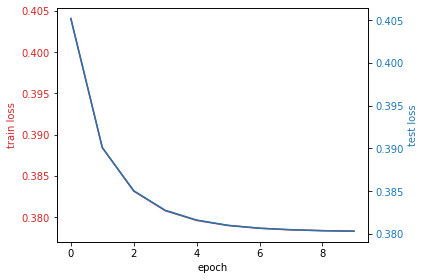

In [ ]:
# now plotting the graph where x axis== epoch number, and y axis== train loss and test loss
#reference for plotting:
#https://matplotlib.org/gallery/api/two_scales.html
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
epoch=[i for i in range(1,16)]
 
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('train loss', color=color)
ax1.plot(trainloss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('test loss', color=color)  # we already handled the x-label with ax1
ax2.plot(testloss, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(updated_w, X[i], updated_b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.95536
0.95296
